# Recursive feature elimination with all variables

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('full_dataset.csv')

In [3]:
# Define the target variable and terrain attributes
target_variable = 'Ymean_times_One_plus_Ymean_minus_CV_over_Ymean_plus_CV_over_2'
terrain_attributes = ['AnnualPrecipitation', 'Aspect', 'Aspect_LP10',
       'Aspect_LP30', 'Aspect_ss_5', 'DEM5', 'DEM5_ns', 'DEM_ss_5',
       'DEM_ss_5_ns', 'FW', 'FW_gs_LP10', 'FW_ss_5', 'FlowAccD8',
       'FlowAccD8_LP10', 'FlowAccMFD1.1', 'FlowAccMFD1.1_LP10',
       'FlowAccMFD1.1_ss_5', 'L8_Band2', 'L8_Band3', 'L8_Band4',
       'L8_Band5', 'L8_Band6', 'L8_Band7', 'L8_EVI', 'L8_NDVI', 'L8_SAVI',
       'LP10', 'LP10_ns', 'LP30', 'MRRTF_LP10', 'MRRTF_ss_5',
       'MRVBF_LP10', 'MRVBF_ss_5', 'MaxTempWarmMonth', 
       'MeanTempColdQuarter', 'MeanTempDryQuarter', 'MeanTempWarmQuarter',
       'MeanTempWetQuarter', 'Midslope_LP10', 'MinTempColdMonth',
       'NegOpen', 'NegOpen_LP10', 'NegOpen_LP30',
       'NegOpen_ss_5', 'NormalizedHeight_LP10', 'PosOpen',
       'PosOpen_LP10', 'PosOpen_LP30', 'PosOpen_ss_5',
       'PrecipColdestQuarter', 'PrecipDriestMonth', 'PrecipDriestQuarter',
       'PrecipSeasonality', 'PrecipWarmestQuarter', 'PrecipWettestMonth',
       'PrecipWettestQuarter', 'ProfileCurvature_LP30', 'SCA_D8_LP10',
       'SCA_MFD1.1', 'SCA_MFD1.1_LP10', 'SCA_MFD1.1_ss_5', 'SWI10',
       'SWI1E16', 'SWI1E2', 'SWI1E2_LP10', 'SWI1E2_LP30', 'SWI1E4',
       'SWI1E8', 'Slope', 'SlopeHeight_LP10', 'Slope_LP10',
       'Slope_LP30', 'Slope_ss_5', 'SoilBulkDensity_0-5cm',
       'SoilBulkDensity_100-200cm', 'SoilBulkDensity_15-30cm',
       'SoilBulkDensity_30-60cm', 'SoilBulkDensity_5-15cm',
       'SoilBulkDensity_60-100cm', 'SoilClay_0-5cm', 'SoilClay_100-200cm',
       'SoilClay_15-30cm', 'SoilClay_30-60cm', 'SoilClay_5-15cm',
       'SoilClay_60-100cm', 'SoilSilt_0-5cm', 'SoilSilt_100-200cm',
       'SoilSilt_15-30cm', 'SoilSilt_30-60cm', 'SoilSilt_5-15cm',
       'SoilSilt_60-100cm', 'Soil_ksat_0-5cm', 'Soil_ksat_100-200cm',
       'Soil_ksat_15-30cm', 'Soil_ksat_30-60cm', 'Soil_ksat_5-15cm',
       'Soil_ksat_60-100cm', 'Soil_om_0-5cm', 'Soil_om_100-200cm',
       'Soil_om_15-30cm', 'Soil_om_30-60cm', 'Soil_om_5-15cm',
       'Soil_om_60-100cm', 'SoilpH_0-5cm', 'SoilpH_100-200cm',
       'SoilpH_15-30cm', 'SoilpH_30-60cm', 'SoilpH_5-15cm',
       'SoilpH_60-100cm', 'Soilsand_0-5cm', 'Soilsand_100-200cm',
       'Soilsand_15-30cm', 'Soilsand_30-60cm', 'Soilsand_5-15cm',
       'Soilsand_60-100cm', 'StandardizedHeight_LP10', 'TPI_LP10',
       'TPI_LP30', 'TPI_ss_5', 'TWI_D8_LP10', 'TWI_MFD1.1',
       'TWI_MFD1.1_LP10', 'TWI_MFD1.1_ss_5', 'TangentCurvature_LP30',
       'TempAnnualRange', 'TemperatureSeasonality', 'ValleyDepth_LP10',
       'annualMeanTemperature', 'channel_network', 'channel_route',
       'hillshade', 'isothermality',
       'meanDiurnalRange', 'vdist_chn_network', 'wind_shelter_LP10']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Store results
r2_scores = []
rmse_scores = []
kept_features_list = []
features = terrain_attributes.copy()

X = data[features]
y = data[target_variable]

# Impute missing values
X = imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

while len(features) > 0:
    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model
    rf.fit(X_train[:, :len(features)], y_train)
    
    # Predict on test set
    y_pred = rf.predict(X_test[:, :len(features)])
    
    # Calculate R² and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the scores and the current set of features
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    kept_features_list.append(features.copy())
    
    # Remove the least important feature
    importances = rf.feature_importances_
    least_important_feature_idx = np.argmin(importances)
    features.pop(least_important_feature_idx)
    
    # Update the training and test sets
    X_train = np.delete(X_train, least_important_feature_idx, axis=1)
    X_test = np.delete(X_test, least_important_feature_idx, axis=1)

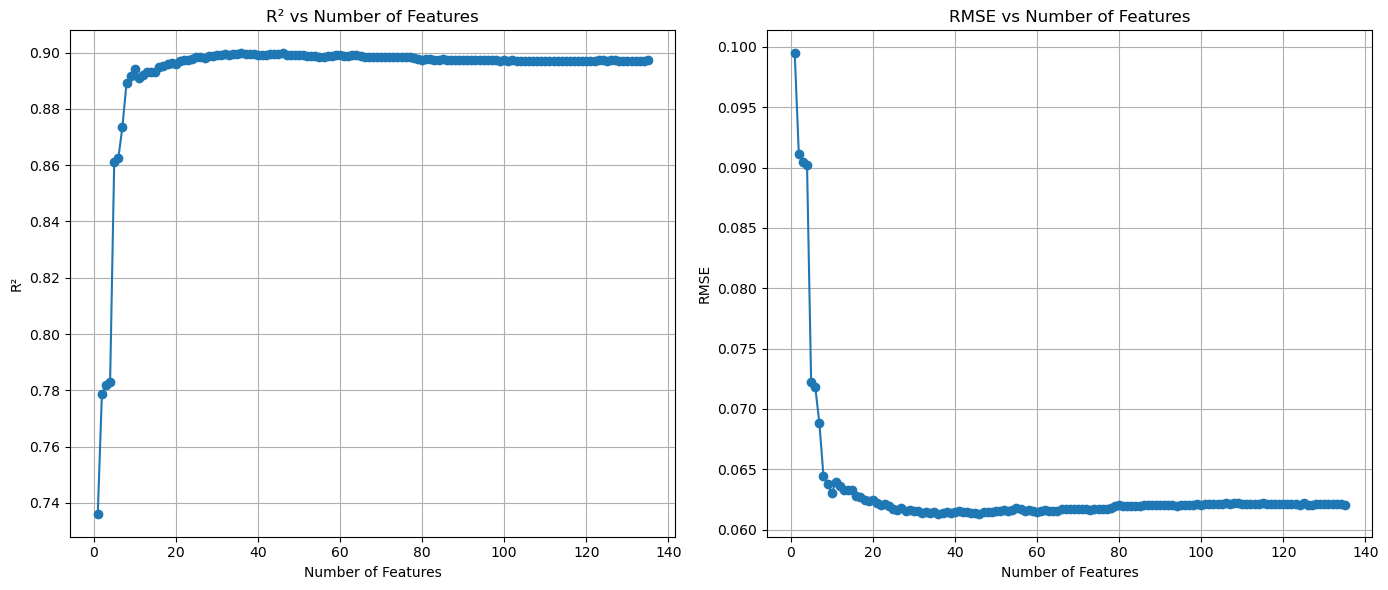

In [4]:
# Plot R² and RMSE vs number of features
num_features = range(len(terrain_attributes), 0, -1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R²')
plt.title('R² vs Number of Features')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_features, rmse_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Create a DataFrame to show the kept features and corresponding R² values
results_df = pd.DataFrame({
    'Number of Features': num_features,
    'R²': r2_scores,
    'Kept Features': kept_features_list
})

# Display the DataFrame
results_df[-10:]

,Number of Features,R²,Kept Features
125,10,0.894200,"[Aspect_LP30, L8_Band4, L8_Band7, L8_EVI, L8_N..."
126,9,0.891613,"[Aspect_LP30, L8_Band4, L8_Band7, L8_EVI, L8_N..."
127,8,0.889245,"[Aspect_LP30, L8_Band4, L8_Band7, L8_EVI, L8_N..."
128,7,0.873639,"[L8_Band4, L8_Band7, L8_EVI, L8_NDVI, LP30, SW..."
129,6,0.862473,"[L8_Band4, L8_Band7, L8_EVI, L8_NDVI, LP30, TP..."
130,5,0.860979,"[L8_Band4, L8_Band7, L8_EVI, LP30, TPI_LP30]"
131,4,0.783059,"[L8_Band4, L8_Band7, L8_EVI, LP30]"
132,3,0.781906,"[L8_Band7, L8_EVI, LP30]"
133,2,0.778615,"[L8_EVI, LP30]"
134,1,0.736154,[L8_EVI]


In [11]:
# Select the 8-variable model from the results_df
selected_features = results_df.loc[results_df['Number of Features'] == 8, 'Kept Features'].values[0]

# Prepare the data with the selected features
X_selected = data[selected_features]
y = data[target_variable]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_selected = imputer.fit_transform(X_selected)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² value for the model with 8 features: {r2}')

R² value for the model with 8 features: 0.8892449999358623


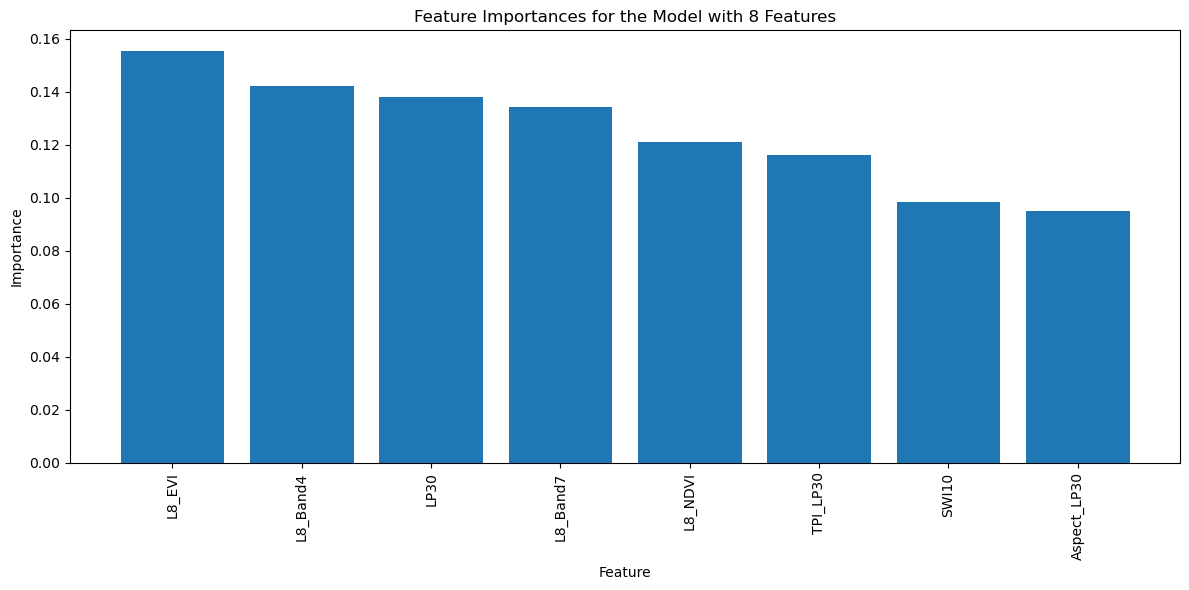

In [13]:
# Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [selected_features[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances for the Model with 8 Features')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

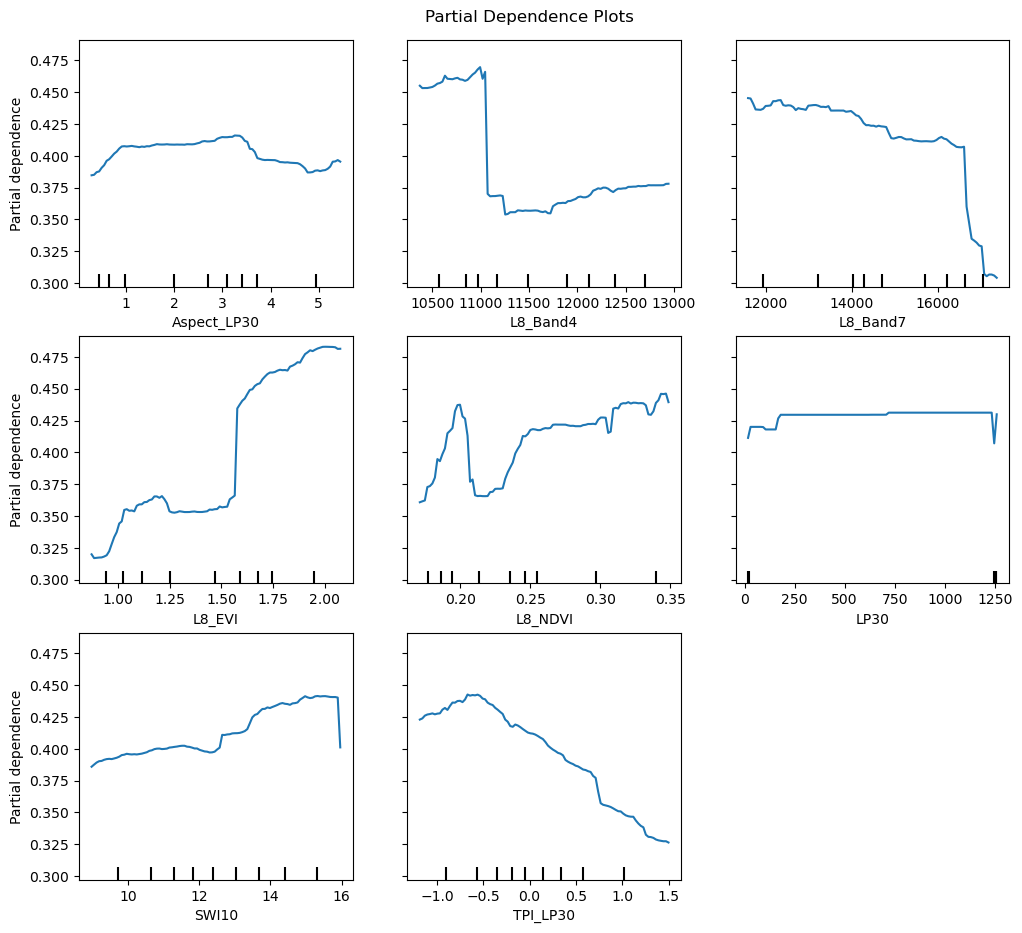

In [15]:
# Plot partial dependence plots for the selected features
fig, ax = plt.subplots(figsize=(12, 10))
display = PartialDependenceDisplay.from_estimator(rf, X_train, features=range(len(selected_features)), feature_names=selected_features, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.95)  # Adjust title position
plt.show()

In [17]:
selected_features

['Aspect_LP30',
 'L8_Band4',
 'L8_Band7',
 'L8_EVI',
 'L8_NDVI',
 'LP30',
 'SWI10',
 'TPI_LP30']